# Charges Insurance  

#### The main objectif is to explain the cost of charges Insurance based on true data

## Library importation 

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [3]:
db=pd.read_csv("/Users/jalis/Downloads/insurance.csv")
db.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
db.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
db['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [6]:
db.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
#Exploring the missing values
db.isnull().sum().sort_values(ascending=False)

charges     0
region      0
smoker      0
children    0
bmi         0
sex         0
age         0
dtype: int64

no missing values

In [8]:
db.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#Rename BMI 
db.rename(columns={'bmi': 'body_mass_index'}, inplace=True)
db.head()

,age,sex,body_mass_index,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
#convert sex variable into a quantitative variable

dummies_1=pd.get_dummies(db['sex'])
dummies_1

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [11]:
#merge it in the dataset

db=pd.concat([db,dummies_1], axis=1)
db.drop('sex', axis=1, inplace=True)

In [17]:
db['male'].value_counts()

1    676
0    662
Name: male, dtype: int64

662 femmes vs 676 hommes 

In [18]:
#encodage smoker variable

sixnine=pd.get_dummies(db['smoker'])
sixnine


,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [19]:
#merge it in the dataset

db=pd.concat([db,sixnine],axis=1)
db.drop("smoker", axis=1,inplace=True)
db.rename(columns={'no':'no_smoker','yes':'smoker'},inplace=True)


In [21]:
#New DataSet

db.head()

,age,body_mass_index,children,region,charges,female,male,no_smoker,smoker
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


In [22]:
db['no_smoker'].value_counts()

1    1064
0     274
Name: no_smoker, dtype: int64

1064 non fumeurs
274 fumeurs

## Exploratory Data Analysis

<AxesSubplot:xlabel='male', ylabel='age'>

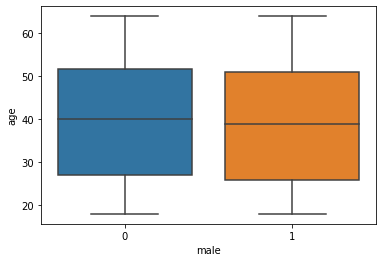

In [25]:
#EDA

sns.boxplot(y='age',x='male',data=db)

the median of women is higher than that of men

<AxesSubplot:xlabel='male', ylabel='children'>

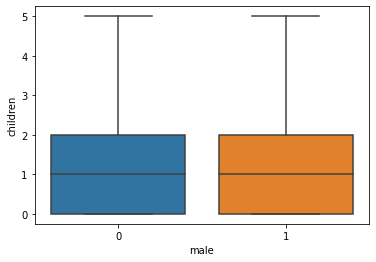

In [26]:
sns.boxplot(x='male', y='children',data=db)

In [27]:
pd.pivot_table(db[['male','children']],index='male',aggfunc='count')

,children
male,
0,662
1,676


no impact between sexe and kids even though men have more childrens than women 

## Exploration of Y variable (charges)


In [28]:
pd.pivot_table(db[['male','charges']],index='male',aggfunc='mean')

,charges
male,
0,12569.578844
1,13956.751178


the average cost for men is higher than for women

In [29]:
#correlations between variables and Y

db.corr()['charges'].sort_values()


no_smoker         -0.787251
female            -0.057292
male               0.057292
children           0.067998
body_mass_index    0.198341
age                0.299008
smoker             0.787251
charges            1.000000
Name: charges, dtype: float64

somes values stand out : 

- Negative relationship between no_smoker and charges 
- Negative relationship between female and charges
- Strong relationship between smoker and charges

<AxesSubplot:xlabel='no_smoker', ylabel='charges'>

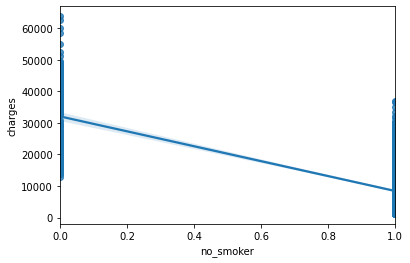

In [30]:
sns.regplot(x='no_smoker', y='charges', data=db)

 negative relationship between no_smoker and charges. In other words, when you dont smoke your charges go down

## TEST STATISTIQUES

In [32]:
#bibliothèque
import scipy.stats
import statsmodels.api as sm

In [33]:

## X is the input variables (or independent variables)
X = db['no_smoker']
## y is the target/dependent variable
y = db['charges']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.27e-283
Time:                        20:23:11   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.205e+04    451.292     71.019      0.000    3.12e+04    3.29e+04
no_smoker  -2.362e+04    506.075    -46.665      0.000   -2.46e+04   -2.26e+04
==============================================================================
Omnibus:                      135.996   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.201
Skew:                           0.727   Prob(JB):                     8.34e-47
Kurtosis:                       4.300   Cond. No.                         4.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: the p-value is less than the alpha (a) level = 0.05, so we reject the null hypothe
as there is evidence that there is a difference between smokers and no smokers . The coefficient -2.362e+04	
means that no smokers get 23620 dollars less than smokers.

In [24]:

## X is the input variables (or independent variables)
X = db['age']
## y is the target/dependent variable
y = db['charges']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           4.89e-29
Time:                        11:42:25   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: the p-value is less than the alpha (a) level = 0.05, there is evidence that there is a difference in charges based on age

In [49]:
X = db[['smoker']]
Y = db['charges']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.6197648148218988

according to the R^2 variable smoker seems to be a good predictor for  insurance charges

In [50]:
lm.coef_

array([23615.96353368])

1 increase of one cigarette, increases bills by 23,615

In [51]:
X = db[['age']]
Y = db['charges']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.08940589967885804

In [52]:
lm.coef_

array([257.72261867])

1 increase of one year, increseases bills by 257$

In [58]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X,Y)

charges_predicted=regr.predict([[98]])
print(charges_predicted)

[28422.70163542]


a 98 year old individual will pay a bill of approximately 28422 $

In [64]:
import pandas
from sklearn import linear_model

X = db[['age', 'children','smoker']]
y = db['charges']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the charges for an individu where the age is 23 with 1 child and no smoker
predicted_charges = regr.predict([[23, 1, 0]])

print(predicted_charges)

[3915.70805013]


A 23 year old non-smoker with one child will pay approximately $3915.70

In [65]:
import pandas
from sklearn import linear_model

X = db[['age', 'children','smoker']]
y = db['charges']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the charges for an individu where the age is 23 with 1 child and no smoker
predicted_charges = regr.predict([[23, 1, 1]])

print(predicted_charges)

[27758.31011413]


A 23 year old smoker with one child will pay approximately $27758.70

In [40]:
import pandas
from sklearn import linear_model

X = db[['age', 'children','smoker']]
y = db['charges']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the charges for an individu where the age is 54 with 3 children and smoker
predicted_charges = regr.predict([[54, 3, 1]])

print(predicted_charges)

[37197.36647338]


A 54 year old smoker with 3 children will pay $37,197

## CONCLUSION 

We can conclude that smoking is a true predictor for the cost of charges insurance. 
The more you smoke the more you pay.